# Assignment 1

## Task 1 – Rough-cut modelling

### 1.1 Olympus Träningscenter Gym

For our example of rough-cut modeling, we choose to model a gym as a system where gym members (later members) are treated as customers and workout stations (later stations) (e.g., cable machines, cardio machines, free-weight, weight machines) are treated as servers. To simplify the system, we are going to assume there are no peak hours in the gym and number of members is equally distributed among the day. For the sake of example and to have a better understanding, we choose the campus gym Olympus Träningscenter (later Olympus), but this could apply to any traditional gym system.

As mentioned before, there are 4 different types of stations with various number of machines/benches available:

- 8 cable machines
  - Average time spent on a cable machine is 5 minutes
- 18 cardio machines
  - Averate time spend on a cardio machine is 30 minutes
- 4 free-weight benches
  - Average time spent on free-weight bench is 10 minutes
- 12 weight machines
  - Average time spent on weight machines bench is 10 minutes

In Olympus it is not as crowded as in bigger commercial gyms and we would say that the average arrival time is 20 members per hour. We have two types of members: 

- ones who focus only on cardio (25% of all members)
  - they only come to the gym to do cardio and do not use other equipment
- other who focus on muscle building
  - They use all types of stations.
  - Each member of this type (simplification) has the same workout routine consisting of starting with cardio, then free-weight, then cable machine, and finishing with weight machine

### 1.2 Formal Notation and Distributions for Queue Modeling

![model](rough-cut-model.drawio_2.png)

# We have 4 queues, one for each station type.

(m/h) = members per hour

## Arrival rates

lambda_justCardio = 5 m/h

lambda_other = 15 m/h

## Cardio (M|M|18)

lambda = 20 m/h

mu = 2 # service rate

service_time = 1/mu = 1/2h

## Free-weights (M|M|4)

lambda = 15 m/h

mu = 6

service_time = 1/mu = 1/6h

## Cable Machines (M|M|8)

lambda = 15 m/h

mu = 12

service_time = 1/mu = 1/12h

## Weight Machines (M|M|12)

lambda = 15 m/h

mu = 6

service_time = 1/mu = 1/6h

### 1.3 Solve model & draw conclusions

In [114]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [115]:
# vars
c_cardio = 18
c_free_weight = 4
c_cable = 8
c_weight_machine = 12

lambda_cardio = 20
lambda_free_weight = 15
lambda_cable = 15
lambda_weight_machine = 15

mu_cardio = 2
mu_free_weight = 6
mu_cable = 12
mu_weight_machine = 6


def calculate_rho(lambda_param, c, mu):
    return lambda_param / (c * mu) 

def P0(lambda_, mu, rho, c):
    part1 = sum((lambda_ / mu) ** n / math.factorial(n) for n in range(c))
    part2 = (lambda_ / mu) ** c / (math.factorial(c) * (1 - rho))
    return 1 / (part1 + part2)

def L(c, rho , P0):
    part1 = c * rho
    part2_numerator = (part1 ** (c + 1)) * P0
    part2_denominator = math.factorial(c) * c * ((1 - rho) ** 2)

    part2 = part2_numerator / part2_denominator
    return part1 + part2

def W(L, lambda_param):
    return L / lambda_param

def W_Q(W, mu):
    return W - (1 / mu)

def L_Q(lambda_param, W_Q):
    return lambda_param * W_Q


print("_______")
print("rho:")
rho_cardio = calculate_rho(lambda_cardio, c_cardio, mu_cardio)
rho_free_weight = calculate_rho(lambda_free_weight, c_free_weight, mu_free_weight)
rho_weight_machine = calculate_rho(lambda_weight_machine, c_weight_machine, mu_weight_machine)
rho_cable = calculate_rho(lambda_cable, c_cable, mu_cable)
print(f"rho for Cardio Machines: {rho_cardio:.6f}")
print(f"rho for Free Weights: {rho_free_weight:.6f}")
print(f"rho for Cable Machines: {rho_cable:.6f}")
print(f"rho for Weight Machines: {rho_weight_machine:.6f}")

print("_______")
print("P0:")
P0_cardio = P0(lambda_cardio, mu_cardio, rho_cardio, c_cardio)
P0_free_weight = P0(lambda_free_weight, mu_free_weight, rho_free_weight, c_free_weight)
P0_cable = P0(lambda_cable, mu_cable, rho_cable, c_cable)
P0_weight_machine = P0(lambda_weight_machine, mu_weight_machine, rho_weight_machine, c_weight_machine)
print(f"P0 for Cardio Machines: {P0_cardio:.6f}")
print(f"P0 for Free Weights: {P0_free_weight:.6f}")
print(f"P0 for Cable Machines: {P0_cable:.6f}")
print(f"P0 for Weight Machines: {P0_weight_machine:.6f}")

print("_______")
print("L:")
L_cardio = L(c_cardio, rho_cardio, P0_cardio)
L_free_weight = L(c_free_weight, rho_free_weight, P0_free_weight)
L_cable = L(c_cable, rho_cable, P0_cable)
L_weight_machine = L(c_weight_machine, rho_weight_machine, P0_weight_machine)
print(f"L for Cardio Machines: {L_cardio:.6f}")
print(f"L for Free Weights: {L_free_weight:.6f}")
print(f"L for Cable Machines: {L_cable:.6f}")
print(f"L for Weight Machines: {L_weight_machine:.6f}")

print("_______")
print("W:")
W_cardio = W(L_cardio, lambda_cardio)
W_free_weight = W(L_free_weight, lambda_free_weight)
W_cable = W(L_cable, lambda_cable)
W_weight_machine = W(L_weight_machine, lambda_weight_machine)
print(f"W for Cardio Machines: {W_cardio:.6f}")
print(f"W for Free Weights: {W_free_weight:.6f}")
print(f"W for Cable Machines: {W_cable:.6f}")
print(f"W for Weight Machines: {W_weight_machine:.6f}")

print("_______")
print("W_Q:")
W_Q_cardio = W_Q(W_cardio, mu_cardio)
W_Q_free_weight = W_Q(W_free_weight, mu_free_weight)
W_Q_cable = W_Q(W_cable, mu_cable)
W_Q_weight_machine = W_Q(W_weight_machine, mu_weight_machine)
print(f"W_Q for Cardio Machines: {W_Q_cardio:.6f}")
print(f"W_Q for Free Weights: {W_Q_free_weight:.6f}")
print(f"W_Q for Cable Machines: {W_Q_cable:.6f}")
print(f"W_Q for Weight Machines: {W_Q_weight_machine:.6f}")

print("_______")
print("L_Q:")
L_Q_cardio = L_Q(lambda_cardio, W_Q_cardio)
L_Q_free_weight = L_Q(lambda_free_weight, W_Q_free_weight)
L_Q_cable = L_Q(lambda_cable, W_Q_cable)
L_Q_weight_machine = L_Q(lambda_weight_machine, W_Q_weight_machine)
print(f"L_Q for Cardio Machines: {L_Q_cardio:.6f}")
print(f"L_Q for Free Weights: {L_Q_free_weight:.6f}")
print(f"L_Q for Cable Machines: {L_Q_cable:.6f}")
print(f"L_Q for Weight Machines: {L_Q_weight_machine:.6f}")


_______
rho:
rho for Cardio Machines: 0.555556
rho for Free Weights: 0.625000
rho for Cable Machines: 0.156250
rho for Weight Machines: 0.208333
_______
P0:
P0 for Cardio Machines: 0.000045
P0 for Free Weights: 0.073695
P0 for Cable Machines: 0.286504
P0 for Weight Machines: 0.082085
_______
L:
L for Cardio Machines: 10.019910
L for Free Weights: 3.033095
L for Cable Machines: 1.250009
L for Weight Machines: 2.500003
_______
W:
W for Cardio Machines: 0.500996
W for Free Weights: 0.202206
W for Cable Machines: 0.083334
W for Weight Machines: 0.166667
_______
W_Q:
W_Q for Cardio Machines: 0.000996
W_Q for Free Weights: 0.035540
W_Q for Cable Machines: 0.000001
W_Q for Weight Machines: 0.000000
_______
L_Q:
L_Q for Cardio Machines: 0.019910
L_Q for Free Weights: 0.533095
L_Q for Cable Machines: 0.000009
L_Q for Weight Machines: 0.000003


In [105]:
# Whole system metrics

p_only_cardio = 0.25
p_other = 1 - p_only_cardio

# weighted averages of the metrics

def weighted_average(cardio_metric, free_weight_metric, cable_metric, weight_machine_metric):
    leftSide = (p_only_cardio + p_other) * cardio_metric # 1 * cardio_metric
    rightSide = (p_other *  free_weight_metric) + (p_other * cable_metric) + (p_other * weight_machine_metric)

    return leftSide + rightSide


rho_system = weighted_average(rho_cardio, rho_free_weight, rho_cable, rho_weight_machine)
print(f"rho for the whole system: System is utilized {rho_system:.6f} of the time")

P0_system = weighted_average(P0_cardio, P0_free_weight, P0_cable, P0_weight_machine)
print(f"P0 for the whole system: System is not utilized {P0_system:.6f} of the time")

L_system = weighted_average(L_cardio, L_free_weight, L_cable, L_weight_machine)
print(f"L for the whole system: Avg. {L_system:.2f} people are the system")

W_system = weighted_average(W_cardio, W_free_weight, W_cable, W_weight_machine)
print(f"W for the whole system: Avg. Time spent the system is {W_system:.6f} hours")

W_Q_system = weighted_average(W_Q_cardio, W_Q_free_weight, W_Q_cable, W_Q_weight_machine)
print(f"W_Q for the whole system: Avg. Time spent in queue {W_Q_system:.6f} hours")

L_Q_system = weighted_average(L_Q_cardio, L_Q_free_weight, L_Q_cable, L_Q_weight_machine)
print(f"L_Q for the whole system: Avg. {L_Q_system:.2f} people are in the queue")


rho for the whole system: System is utilized 1.297743 of the time
P0 for the whole system: System is not utilized 0.331759 of the time
L for the whole system: Avg. 15.11 people are the system
W for the whole system: Avg. Time spent the system is 0.840151 hours
W_Q for the whole system: Avg. Time spent in queue 0.027651 hours
L_Q for the whole system: Avg. 0.42 people are in the queue


# Task 2 – Random Number and Variate Generation

2.1 Develop your random number generator according to the Multiplicative Congruential Method and generate a sequence of 30 numbers for each of the following cases:


a) X0 = 8, a = 13, m = 16 

b) X0 = 8, a = 11, m = 30 

c) X0 = 7, a = 7, m = 16 

d) X0 = 8, a = 7, m = 25

2.2 Verify uniformity and independence of the sequences generated in 2.1. Describe how you apply the methods and compare the results (e.g., by using a table).

2.3 Develop a Random Variate Generator for the following distribution:

In [29]:

# a * x0 % m
# X1 = [43(117)]mod 1, 000 = 31, R1 = 31/1000 = .031

# R -> between 0 - 1 -> Xi / m

N = 30
PRINT_EACH_STEP = False

def multiplicative_congruential_method(x0, a, m , n):
    sequence = [x0]
    r_sequence = []
    firstR = x0 / m
    r_sequence.append(firstR)
    
    for i in range(n-1):
        Xi = (a * sequence[-1]) % m 
        sequence.append(Xi)
        Ri = Xi / m
        r_sequence.append(Ri)
        if PRINT_EACH_STEP:
            print(f"X{i+1} = [{a}({sequence[-1]})]mod {m} = {Xi}")
            print(f"R{i+1} = {Xi}/{m} = {Ri}")

    return r_sequence

print(multiplicative_congruential_method(117, 43, 1000, 4))

# case 1
print("Case 1")
case_1 = multiplicative_congruential_method(8, 13, 16, N)
print(case_1)
print("_______")
print("Case 2")
case_2 = multiplicative_congruential_method(8, 11, 30, N)
print(case_2)
print("_______")
print("Case 3")
case_3 = multiplicative_congruential_method(7, 7, 16, N)
print(case_3)
print("_______")
print("Case 4")
case_4 = multiplicative_congruential_method(8, 7, 25, N)
print(case_4)
print("_______")


[0.117, 0.031, 0.333, 0.319]
Case 1
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
_______
Case 2
[0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333, 0.26666666666666666, 0.9333333333333333]
_______
Case 3
[0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375, 0.0625, 0.4375

<table>
    <tr>
        <td><img src="./A3_1.png" alt="A3_1"></td>
        <td><img src="./A3_2.png" alt="A3_2"></td>
    </tr>
</table>

In [39]:
alpha = 0.05

def frequency_test(numbers):
    # step 1
    numbers.sort()
    # step 2
    N = len(numbers)
    D_plus_arr = []
    D_minus_arr = []
    D = 0
    for i in range(len(numbers)):
        j = i + 1
        R_i = numbers[i]
        D_plus_i = j/N - R_i
        D_minus_i = R_i - (j-1)/N
        D_plus_arr.append(D_plus_i)
        D_minus_arr.append(D_minus_i)
    D_plus = max(D_plus_arr)
    D_minus = max(D_minus_arr)
    # step 3
    D = max(D_plus, D_minus)
    print(f"D: {D}")
    # step 4 -> read D_alpha from the table
    D_alpha = 1.36 / math.sqrt(N)

    # step 5
    if D <= D_alpha:
        print("The numbers are uniformly distributed")
    else:
        print("The numbers are not uniformly distributed")

print("_______ FREQUENCY TEST _______")
print("Case 1")
frequency_test(case_1)
print("_______")
print("Case 2")
frequency_test(case_2)
print("_______")
print("Case 3")
frequency_test(case_3)
print("_______")
print("Case 4")
frequency_test(case_4)


print("_______ AUTOCORRELATION TEST _______")

lag = 4

def get_M(N, l, i):
    M_math = 1 # just to start the loop correctly
    M = 0
    while (i + (M_math + 1) * l) <= N:
        M_math += 1
        M += 1
    
    return M

def autocorrelation_test(sequence, lag = 1, i = 1):
    N = len(sequence)
    M = get_M(N, lag, i)
    mean_sequence = sum(sequence) / N
    print(f"Mean: {mean_sequence}")
    print(f"M: {M}")
    print(f"N: {N}")
    total_sum = 0
    for m in range(M):
        # just BS formula to code transformation
        k = m + 1
        k_1 = k + 1
        idx_1 = i + k * lag
        idx_2 = i + k_1 * lag
        R_i_kl = sequence[idx_1]
        R_i_kl_1 = sequence[idx_2]
        iteration_factor = R_i_kl * R_i_kl_1
        total_sum += iteration_factor
    
    autocorr = ((1 / (M + 1)) * total_sum) - 0.25
    # step 3
    sigma_rho = math.sqrt((13 * M + 7)) / (12 * (M+1))
    
    # step 4
    Z0 = autocorr / sigma_rho
    
    # step 5
    Z_alpha = 1.96 # from the table

    return Z0, Z_alpha , -Z_alpha <= Z0 <= Z_alpha


print("Case 1")
print(autocorrelation_test(case_1, lag))
print("_______")
print("Case 2")
print(autocorrelation_test(case_2, lag))
print("_______")
print("Case 3")
print(autocorrelation_test(case_3, lag))
print("_______")
print("Case 4")
print(autocorrelation_test(case_4, lag))

_______ FREQUENCY TEST _______
Case 1
D: 0.5
The numbers are not uniformly distributed
_______
Case 2
D: 0.43333333333333335
The numbers are not uniformly distributed
_______
Case 3
D: 0.5625
The numbers are not uniformly distributed
_______
Case 4
D: 0.24
The numbers are uniformly distributed
_______ AUTOCORRELATION TEST _______
Case 1
Mean: 0.5
M: 6
N: 30
(-0.32539568672798436, 1.96, True)
_______
Case 2
Mean: 0.6
M: 6
N: 30
(1.6327632458484194, 1.96, True)
_______
Case 3
Mean: 0.25
M: 6
N: 30
(-1.4846178206964282, 1.96, True)
_______
Case 4
Mean: 0.48533333333333323
M: 6
N: 30
(0.26500224727127075, 1.96, True)


# 2.3
Develop a Random Variate Generator for the following distribution:

![pdf](./T2_3_cdf.png)

To apply the inverse-transform technique we first need to compute the Cumulative Distribution Function we used mathematical tool WolframAlpha to get the CDF and inverse CDF part and then did a small Python program to get the histogram of the generated random variates.

**CDF**
for X in rage of 2 to 3
we compute the following eqution 

<table style="width: 50%">
    <tr></tr>
        <td><img src="wolfram_eq1.png" alt="w1" style="width: 100%; max-height: 500px; object-fit: contain;">
        <p style="text-align: center;">
        Equation 1</p></td>
    </tr>
</table>

then we plug 3 into eqution1 to get F(3) = 1/4 (see equation 2) 

<table style="width: 50%">
    <tr></tr>
        <td><img src="wolfram_eq2.png" alt="w1" style="width: 100%; max-height: 500px; object-fit: contain;">
        <p style="text-align: center;">
        Equation 2</p></td>
    </tr>
</table>

now that we have F(3) we can compute x>3
F(x) = F(3)+ intgral from 3 to x of the seconed part of the equation

<table style="width: 50%">
    <tr>
        <td><img src="wolfram2.png" alt="w2" width="100%" style="width: 100%; max-height: 500px; object-fit: contain;"/>
                <p style="text-align: center;">
        Equation 3</p>
        </td>
    </tr>
</table>

from eqution 1 and 3 we get CDF F(x) = 
\[
\begin{cases}
0, & \text{for } x < 2 \\
\frac{4}{1} (x - 2)^2, & \text{for } 2 \leq x \leq 3 \\
\frac{12 - x^2 + 12x - 24}{1}, & \text{for } 3 < x \leq 6 \\
1, & \text{for } x > 6
\end{cases}
\]


next we need to inverse the CDF :
for U in the domain 0,0.25:

<table style="width: 50%">
    <tr>
        <td><img src="wolfram_eq4.png" alt="w2" width="100%" style="width: 100%; max-height: 500px; object-fit: contain;"/>
                <p style="text-align: center;">
        Equation 4</p>
        </td>
    </tr>
</table>

and similarly we can comput for the domain 0.25,1

<table style="width: 50%">
    <tr>
        <td><img src="wolfram_eq5.png" alt="w2" width="100%" style="width: 100%; max-height: 500px; object-fit: contain;"/>
                <p style="text-align: center;">
        Equation 4</p>
        </td>
    </tr>
</table>

then we take out eqution and implement them in to the python code





##################
[0.9664535356921388, 0.4407325991753527, 0.007491470058587191, 0.9109759624491242, 0.939268997363764, 0.5822275730589491, 0.6715634814879851, 0.08393822683708396, 0.7664809327917963, 0.23680977536311776, 0.030814021726609964, 0.7887727172362835, 0.3460889655971231, 0.6232814750391685, 0.6158156951036152, 0.14855463870828756, 0.18309064740993164, 0.11441296968868764, 0.014618780486909122, 0.48675154060475834, 0.9649015609162157, 0.06456228097718608, 0.5410881855511303, 0.46589855900830957, 0.6014634495610515, 0.08892882999066232, 0.5790026861873665, 0.26958550381944824, 0.5564325605562156, 0.6446342341782827, 0.48103637136651844, 0.35523914744298335, 0.249152121361209, 0.9335154980423467, 0.45338801947649354, 0.5301612069115903, 0.019299566309716853, 0.5081019257797922, 0.005780237417743139, 0.14376842759559538, 0.47282692534740633, 0.3773474407725964, 0.05417519864614284, 0.5875285081310694, 0.1640032237419612, 0.5573302374414681, 0.1442457216019083, 0.93730708469622

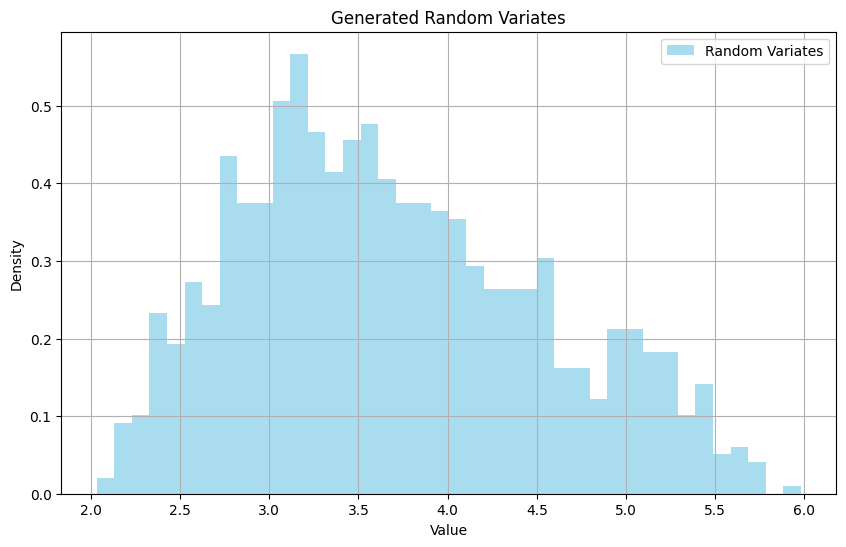

In [127]:
# inverse transform sampling method.
SEED = 1234
NUMBER_OF_SAMPLES = 1000

# Step 0: Generate random numbers
def generate_array_of_random_numbers(seed, number_of_samples):
    random.seed(seed)
    return [random.random() for _ in range(number_of_samples)]
    
random_uniform_numbers = generate_array_of_random_numbers(SEED, NUMBER_OF_SAMPLES)
print("##################")
print(random_uniform_numbers)
print("##################")

# Step 3: Implement calculated inverse CDF as code 
def inverse_cdf(U):
    if U <= 0.25:
        return 2 + 2 * math.sqrt(U)
    else:
        return 6 - 2 * math.sqrt(3) * math.sqrt(1 - U)


# Step 4: Generate random variates
def generate_random_variates(random_numbers):
    return [inverse_cdf(u) for u in random_numbers]

random_variates = generate_random_variates(random_uniform_numbers)
print("##################")
print(random_variates)
print("##################")


SHOW_PDF = False

plt.figure(figsize=(10, 6))
plt.hist(random_variates, bins=40, density=True, alpha=0.7, color='skyblue', edgecolor=None, label='Random Variates')

if (SHOW_PDF):
    x = np.linspace(2, 6, 100)
    y = np.piecewise(x, [x <= 3, (x > 3) & (x <= 6)], [lambda x: 0.5 * (x - 2), lambda x: 0.5 * (2 - x / 3)])
    plt.plot(x, y, color='blue', linewidth=2, label='PDF')


plt.title('Generated Random Variates')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Task 3 - Input modeling

Alice and Bob are running a small takeaway street-food restaurant downtown. In order to analyze the performance of the restaurant, they collected some data about their customers. In particular, the dataset contains the following info (see attached CSV file): Order ID, Customer Name, Order Date, Quantity of Items, Delivery Time Taken (mins)

Create a Queueing Model for the restaurant and analyze the performance according to the provided observations. Can Alice and Bob improve the performance? How?

Describe and motivate your assumptions (if any).

In [129]:
data = pd.read_csv('data.csv')
print(data.head(10))

  Order ID Customer Name           Order Date  Quantity of Items  \
0      OD1         Srini  2022-01-03 01:25:00                  5   
1      OD2       Revandh  2022-01-01 20:12:40                  5   
2      OD3         David  2022-01-02 08:56:40                  7   
3      OD4         Selva  2022-01-02 04:34:20                  5   
4      OD5         Vinny  2022-01-02 01:23:20                  4   
5      OD6           Dev  2022-01-02 14:28:40                  6   
6      OD7         Meera  2022-01-01 21:25:00                  2   
7      OD8       Sabeena  2022-01-02 05:07:40                  4   
8      OD9         David  2022-01-02 15:09:00                  5   
9     OD10          Rifa  2022-01-01 22:44:20                  3   

   Delivery Time Taken (mins)  
0                          47  
1                          41  
2                          30  
3                          30  
4                          18  
5                          21  
6                          

## Create a Queuing model

Arrival rate -> random and independant -> eksponential

Service rate -> uniform

Servers -> Alice & Bob -> 2

System capacity -> not specified -> assumed to be unlimited

unlimited calling population

FIFO principle

-> M/M/2

![food_truck](Food_truck.drawio.png)

Size of interval/bins: 23


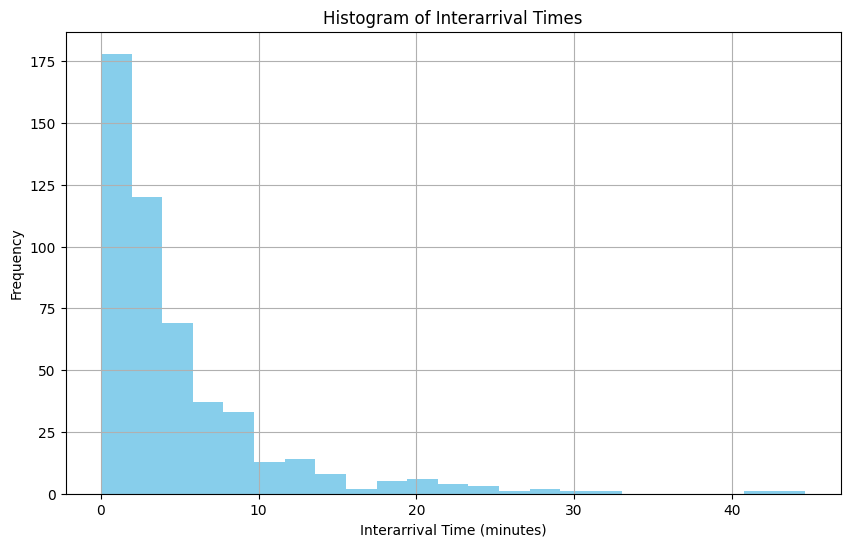

In [130]:
# Get mu(service-rate) and lambda(interarrival time) for food truck

size_of_interval = math.sqrt(len(data))
size_of_interval = math.ceil(size_of_interval)
size_of_interval = int(size_of_interval)
print(f"Size of interval/bins: {size_of_interval}")

def calculate_inter_arrival_times():
    order_times_sorted = data["Order Date"].sort_values()
    order_times = order_times_sorted.tolist()
    order_dates = [datetime.strptime(date, "%Y-%m-%d %H:%M:%S") for date in order_times]
    inter_arrival_times = []
    for i in range(1, len(order_dates)):
        current_time = order_dates[i]
        previous_time = order_dates[i-1]
        diff = current_time - previous_time
        diff_in_minutes = diff.total_seconds() / 60
        inter_arrival_times.append(diff_in_minutes)
    return inter_arrival_times

inter_arrival_times = calculate_inter_arrival_times()

plt.figure(figsize=(10, 6))
plt.hist(inter_arrival_times, bins=size_of_interval, color='skyblue')
plt.title('Histogram of Interarrival Times')
plt.xlabel('Interarrival Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the figure above we would assume it is exponential distribution for interarrival times. Lets check with Q-Q plot


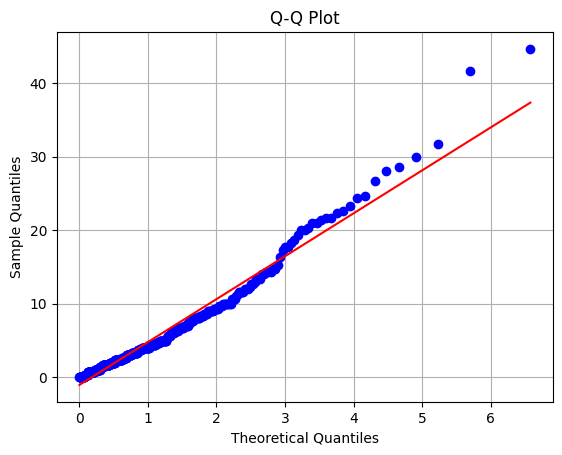

Lambda for the exponential distribution: 0.209546


In [132]:
print("From the figure above we would assume it is exponential distribution for interarrival times. Lets check with Q-Q plot")

import scipy.stats as stats

assumed_distribution = "expon"

# Draw a Q-Q plot for the data
stats.probplot(inter_arrival_times, dist=assumed_distribution, plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

plt.show()

# Get the lambda for the exponential distribution
lambda_interarrival = 1 / np.mean(inter_arrival_times)
print(f"Lambda for the exponential distribution: {lambda_interarrival:.6f}")

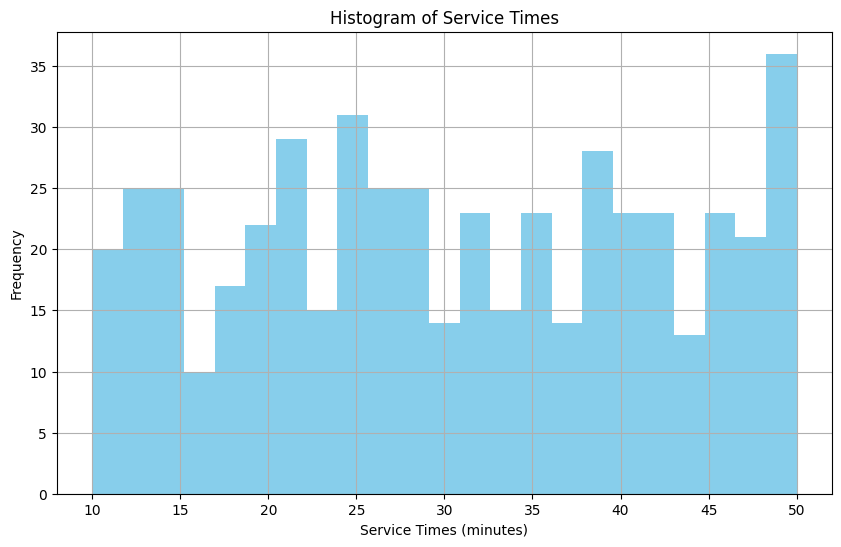

In [133]:
service_times = data["Delivery Time Taken (mins)"].tolist()

plt.figure(figsize=(10, 6))
plt.hist(service_times, bins=size_of_interval, color='skyblue')
plt.title('Histogram of Service Times')
plt.xlabel('Service Times (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

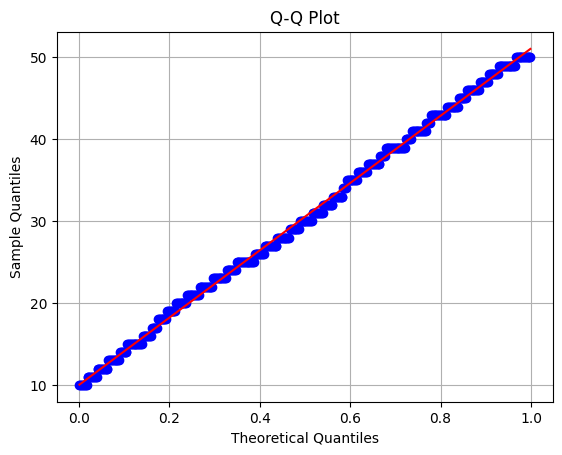

Mu for the uniform distribution: 0.029 orders per min
Lambda for the exponential distribution: 0.210 orders per min


In [135]:
assumed_distribution_service_time = "uniform"

# Draw a Q-Q plot for the data
stats.probplot(service_times, dist=assumed_distribution_service_time, plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

plt.show()

# Get the mu for the uniform distribution
d_minus = min(service_times)
d_plus = max(service_times)
mean_service_time = d_minus + d_plus / 2
mu_service_time = 1 / mean_service_time
print(f"Mu for the uniform distribution: {mu_service_time:.3f} orders per min")
print(f"Lambda for the exponential distribution: {lambda_interarrival:.3f} orders per min")

In [137]:
# M/M/2 queue
servers = 2
rho_ft = calculate_rho(lambda_interarrival, servers, mu_service_time)
p0_ft = P0(lambda_interarrival, mu_service_time, rho_ft, servers)
L_ft = L(servers, rho_ft, p0_ft)
W_ft = W(L_ft, lambda_interarrival)
W_Q_ft = W_Q(W_ft, mu_service_time)
L_Q_ft = L_Q(lambda_interarrival, W_Q_ft)

print("_______")
print("Inputs for M/M/2 queue")
print(f"Lambda: {lambda_interarrival:.3f} orders per minute")
print(f"Mu: {mu_service_time:.3f} orders per minute")
print("_______")
print("Metrics for M/M/2 queue")
print(f"Rho: {rho_ft:.3f}")
print(f"P0: {p0_ft:.3f}")
print(f"W: {W_ft:.3f}")
print(f"L: {L_ft:.3f}")
print(f"W_Q: {W_Q_ft:.3f}")
print(f"L_Q: {L_Q_ft:.3f}")

_______
Inputs for M/M/2 queue
Lambda: 0.210 orders per minute
Mu: 0.029 orders per minute
_______
Metrics for M/M/2 queue
Rho: 3.667
P0: -0.571
W: -2.812
L: -0.589
W_Q: -37.812
L_Q: -7.923
